# News Mood Data Analysis
 - Of the 5 news organizations, CBS typically has the most positive overall compound sentiment associated with its tweets, as indicated by having the highest data point in the "Overall Media Sentiment" graph.
 - Among all 5 news organizations, the most common data point was "0" in the "Sentiment Analysis of Media Tweets" graph, indicating that most of the tweets are neutral.
 - Of the 5 news organizations, CNN typically has the most negative overall compound sentiment associated with its tweets, as indicated by having the lowest data point in the "Overall Media Sentiment" graph.


In [165]:
# Import deficiencies
import pandas as pd
import tweepy
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [166]:
# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [167]:
# Twitter API Keys
consumer_key = "fkxBgq9L4nHMvZOh8sJgWhPxI"
consumer_secret = "4vbR5Pc69sHkD2rRt4BySnKoknx2YfAr3U3RRKnPhqatISZi8D"
access_token = "2697326256-8rbvcf2wW0JSdcuS3cyZf6DO8odMbnW5geqytCS"
access_token_secret = "UEpJXymFPkKZmoanJRVMURa4DodWzaDgZpWY2bLAmIKTd"

In [168]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [169]:
# Target news sites for sentiment analysis
news_list = ["@BBC", "@CBS", "@CNN", "@FoxNews", "@nytimes"]

# Array to hold setiment
sentiments = []

In [170]:
# Loop through all target users
for target_news in news_list:
    
    # Counter
    counter = 1

    # Get all tweets from home feed
    public_tweets = api.user_timeline(target_news,count=100, result_type="recent")

    # Format news org name for df later
    news_org = target_news.replace("@", "")

    # Loop through all tweets 
    for tweet in public_tweets:

        # Run Vader Analysis on each tweet
        compound = analyzer.polarity_scores(tweet["text"])["compound"]
        pos = analyzer.polarity_scores(tweet["text"])["pos"]
        neu = analyzer.polarity_scores(tweet["text"])["neu"]
        neg = analyzer.polarity_scores(tweet["text"])["neg"]
        tweets_ago = counter

        # Add sentiments for each tweet into an array
        sentiments.append({"News Org": tweet["user"]["name"],
                           "Date": tweet["created_at"],
                           "Text": tweet["text"],
                           "Compound": compound,
                           "Positive": pos,
                           "Neutral": neu,
                           "Negative": neg,
                           "Tweets Ago": counter})

        # Add to counter 
        counter = counter + 1
    

In [171]:
# Convert sentiments to DataFrame
sentiments_pd = pd.DataFrame.from_dict(sentiments)
sentiments_pd.head()

,Compound,Date,Negative,Neutral,News Org,Positive,Text,Tweets Ago
0,0.0000,Thu Mar 08 21:28:00 +0000 2018,0.000,1.000,BBC,0.000,This Ancient Egyptian pharaoh invested more in...,1
1,-0.2732,Thu Mar 08 21:00:04 +0000 2018,0.103,0.845,BBC,0.052,"""No matter where in the world, when civilisati...",2
2,0.4019,Thu Mar 08 20:33:04 +0000 2018,0.000,0.856,BBC,0.144,Jack Jarvis and Victor McDade are back for ano...,3
3,0.0000,Thu Mar 08 20:03:04 +0000 2018,0.000,1.000,BBC,0.000,Lucy and Lee are back! 🙌🎉\n\n#NotGoingOut | 9p...,4
4,0.0000,Thu Mar 08 18:00:06 +0000 2018,0.000,1.000,BBC,0.000,What advice would YOU give your younger self? ...,5


In [172]:
# Reorganize Columns
sentiments_pd = sentiments_pd[["News Org", "Text", "Date", "Compound", "Positive", "Neutral", "Negative", "Tweets Ago"]]

# Output to CSV
sentiments_pd.to_csv('sentiments_pd.csv', encoding='utf-8')

# Output head
sentiments_pd.head()

,News Org,Text,Date,Compound,Positive,Neutral,Negative,Tweets Ago
0,BBC,This Ancient Egyptian pharaoh invested more in...,Thu Mar 08 21:28:00 +0000 2018,0.0000,0.000,1.000,0.000,1
1,BBC,"""No matter where in the world, when civilisati...",Thu Mar 08 21:00:04 +0000 2018,-0.2732,0.052,0.845,0.103,2
2,BBC,Jack Jarvis and Victor McDade are back for ano...,Thu Mar 08 20:33:04 +0000 2018,0.4019,0.144,0.856,0.000,3
3,BBC,Lucy and Lee are back! 🙌🎉\n\n#NotGoingOut | 9p...,Thu Mar 08 20:03:04 +0000 2018,0.0000,0.000,1.000,0.000,4
4,BBC,What advice would YOU give your younger self? ...,Thu Mar 08 18:00:06 +0000 2018,0.0000,0.000,1.000,0.000,5


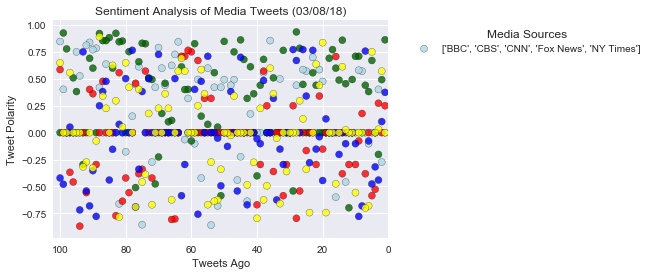

In [173]:
# Create plot

color_map = {"BBC": "lightblue", "CBS": "darkgreen", "CNN": "red", "Fox News": "blue", "The New York Times": "yellow"}

# Scatter plot without the df's splitting
plt.scatter(sentiments_pd["Tweets Ago"],
         sentiments_pd["Compound"],
         color = [color_map[x] for x in sentiments_pd["News Org"]],
         edgecolor = "black",
         label = ["BBC", "CBS", "CNN", "Fox News", "NY Times"],
         alpha=0.8)

# Set x-limits
plt.xlim(102,0)

# Incorporate the other graph properties
plt.title("Sentiment Analysis of Media Tweets (%s)" % (time.strftime("%x")))
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")

# legend on the sidebar
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, title = "Media Sources")

# Set Seaborn styling
sns.set()

# Save Figure
plt.savefig("Analysis/Sentiment_Analysis_Fig.png")

plt.show()

In [174]:
# Create new df that consolidates the compound sentiments for each news org
consolidated_sentiments_df = pd.DataFrame(sentiments_pd.groupby(["News Org"]).mean()["Compound"])
consolidated_sentiments_df = consolidated_sentiments_df.reset_index()
consolidated_sentiments_df

,News Org,Compound
0,BBC,0.174964
1,CBS,0.332212
2,CNN,-0.039235
3,Fox News,-0.009318
4,The New York Times,-0.001862


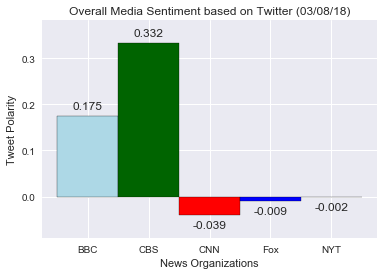

In [175]:
# Create consolidated bar chart

x_axis = np.arange(len(consolidated_sentiments_df["News Org"]))

bar = plt.bar(x_axis, consolidated_sentiments_df["Compound"], 
          color=[color_map[x] for x in consolidated_sentiments_df["News Org"]], 
          edgecolor = "black", 
          width = 1)

# Tell matplotlib where we would like to place each of our x axis headers
tick_locations = [i for i in x_axis]
plt.xticks(tick_locations, ["BBC", "CBS", "CNN", "Fox", "NYT"])

# Adjusting y-limits
plt.ylim(min(consolidated_sentiments_df["Compound"])-0.05, max(consolidated_sentiments_df["Compound"]) + 0.05)


## Adding values above bars 
news_bar = bar.patches

for bars in news_bar:
    
    # Get X and Y placement of label from rect
    y_value = bars.get_height()
    x_value = bars.get_x() + bars.get_width() / 2

    # Number of points between bar and label
    space = 5
    
    # Vertical alignment for positive values
    va = 'bottom'

    # If value of bar is negative: Place label below bar
    if y_value < 0:
        
        # Invert space to place label below
        space *= -1
        
        # Vertically align label at top
        va = 'top'

    # Use Y value as label and format number with three decimal place
    label = "{:.3f}".format(y_value)

    # Create annotation
    plt.annotate(
        label,                      # Use `label` as label
        (x_value, y_value),         # Place label at end of the bar
        xytext=(0, space),          # Vertically shift label by `space`
        textcoords="offset points", # Interpret `xytext` as offset in points
        ha='center',                # Horizontally center label
        va=va)                      # Vertically align label differently for
                                    # positive and negative values.
        
# Incorporate the other graph properties
plt.title("Overall Media Sentiment based on Twitter (%s)" % (time.strftime("%x")))
plt.ylabel("Tweet Polarity")
plt.xlabel("News Organizations")

# Save Figure
plt.savefig("Analysis/Overall_Media_Sentiment_Fig.png")

plt.show()